In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow_decision_forests as tfdf
from src import data_utils as du 
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf


# Replace the path with the path you have in your local file system
csv_file_path = "kaggle_dataset/train.csv"
csv_file_path_test = "kaggle_dataset/test.csv"
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

df_train = pd.read_csv(csv_file_path)
df_test = pd.read_csv(csv_file_path_test)

df_train.drop('Id', axis=1, inplace=True)

du.drop_null_majority_features(df_train, df_test)
du.drop_single_val_majority(df_train, df_test)

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>],
       [<Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'BedroomAbvGr'}>],
       [<Axes: title={'center': 'TotRmsAbvGrd'}>,
        <Axes: title={'center': 'Fireplaces'}>,
        <Axes: title={'center': 'Garage

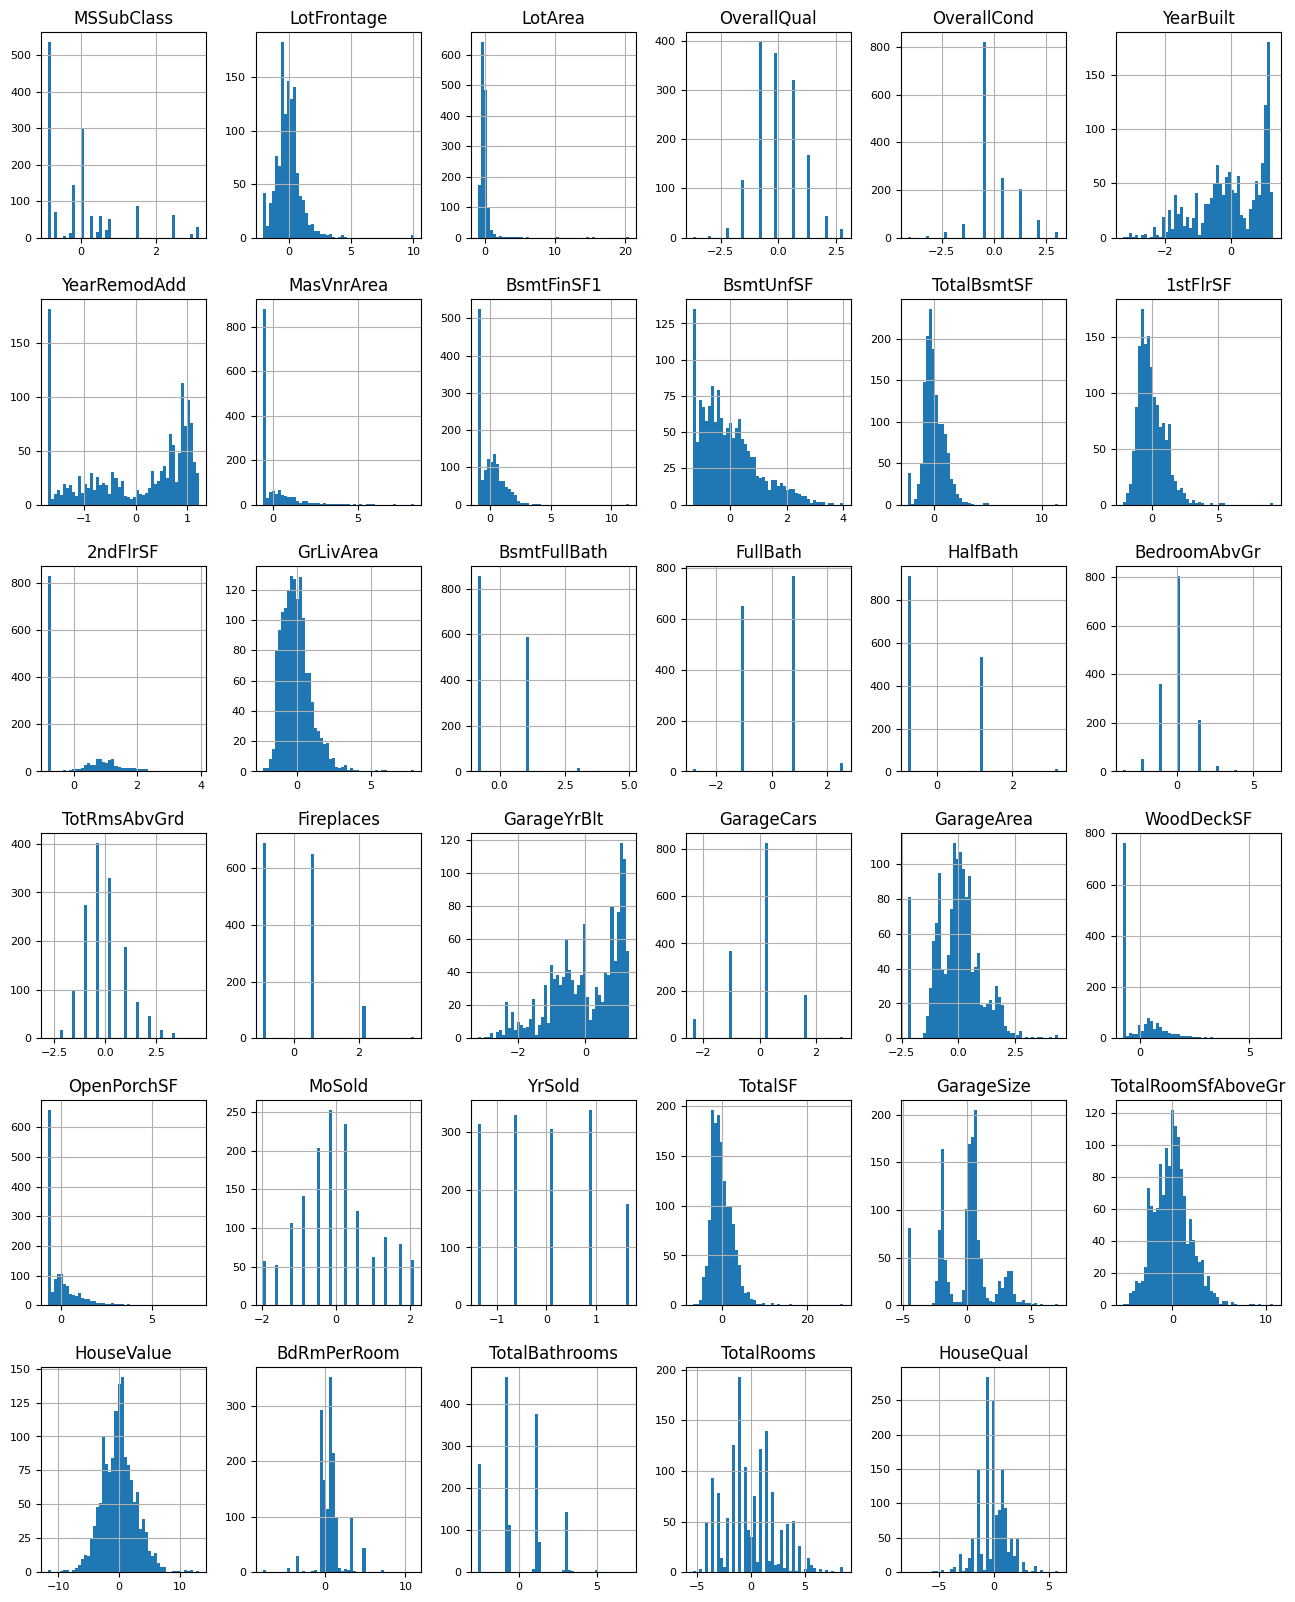

In [42]:
# Store numeric features only and plot them in graphs
df_num = df_train.select_dtypes(include= ['int64', 'float64'])
df_num.drop('SalePrice', axis=1, inplace=True)

from sklearn.preprocessing import StandardScaler
df_num_cols = df_num.columns
scaler = StandardScaler()
df_train[df_num_cols] = scaler.fit_transform(df_train[df_num_cols])

df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [ ]:
# Feature Engineering
df_train['TotalSF'] = df_train['GrLivArea'] + df_train['1stFlrSF'] + df_train['TotalBsmtSF']
df_test['TotalSF'] = df_test['GrLivArea'] + df_test['1stFlrSF'] + df_test['TotalBsmtSF']

df_train['GarageSize'] = df_train['GarageCars'] + df_train['GarageArea']
df_test['GarageSize'] = df_test['GarageCars'] + df_test['GarageArea']

df_train['TotalRoomSfAboveGr'] = (df_train['1stFlrSF'] + df_train['2ndFlrSF']) + df_train['GarageCars']
df_test['TotalRoomSfAboveGr'] = (df_test['1stFlrSF'] + df_test['2ndFlrSF']) + df_test['GarageCars']

df_train['HouseValue'] = df_train['OverallQual'] + df_train['OverallCond'] + df_train['TotalRoomSfAboveGr']
df_test['HouseValue'] = df_test['OverallQual'] + df_test['OverallCond'] + df_test['TotalRoomSfAboveGr']

df_train['BdRmPerRoom'] = df_train['BedroomAbvGr'] / df_train['TotRmsAbvGrd']
df_test['BdRmPerRoom'] = df_test['BedroomAbvGr'] / df_test['TotRmsAbvGrd']

df_train['TotalBathrooms'] = df_train['BsmtFullBath'] + df_train['FullBath'] + df_train['HalfBath']
df_test['TotalBathrooms'] = df_test['BsmtFullBath'] + df_test['FullBath'] + df_test['HalfBath']

df_train['TotalRooms'] = df_train['TotalBathrooms'] + df_train['TotRmsAbvGrd']
df_test['TotalRooms'] = df_test['TotalBathrooms'] + df_test['TotRmsAbvGrd']

df_train['HouseQual'] = (df_train['OverallCond'] + df_train['OverallQual']) 
df_test['HouseQual'] = (df_test['OverallCond'] + df_test['OverallQual'])

df_train['lastRenov'] = ((df_train['YearRemodAdd'] - df_train['YearBuilt']) ** 2) / 2
df_test['lastRenov'] = ((df_test['YearBuilt'] - df_test['YearRemodAdd']) ** 2) / 2

df_train['renovCondCombined'] = (df_train['lastRenov'] / df_train['lastRenov'].max()) * df_train['OverallCond']
df_test['renovCondCombined'] = (df_test['lastRenov'] / df_test['lastRenov'].max()) * df_test['OverallCond']


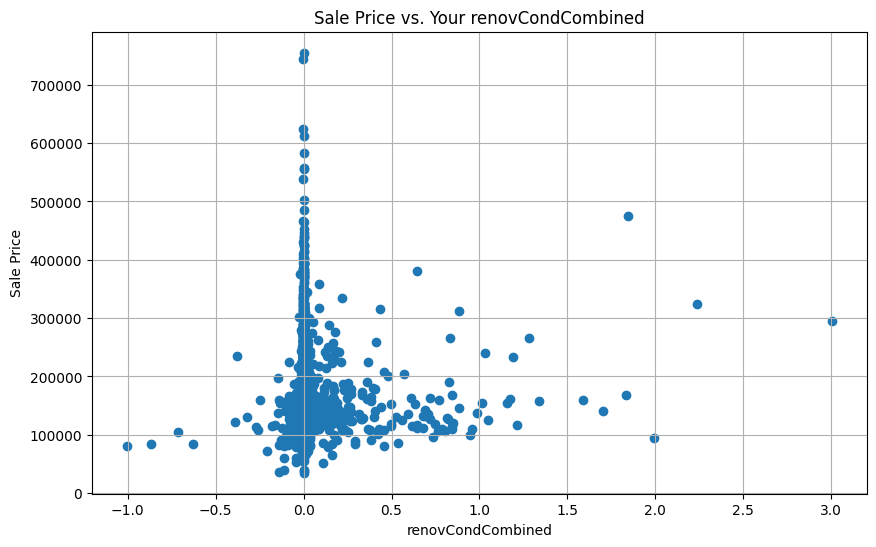

In [78]:
# Plot any single feature against saleprices
plt.figure(figsize=(10, 6))
plt.scatter(df_train['renovCondCombined'], df_train['SalePrice'])
plt.xlabel('renovCondCombined')
plt.ylabel('Sale Price')
plt.title('Sale Price vs. Your renovCondCombined')
plt.grid(True)
plt.show()